In [1]:
# ================= use pyecharts to show interactive charts =============
from pyecharts.globals import CurrentConfig, NotebookType
CurrentConfig.NOTEBOOK_TYPE = NotebookType.JUPYTER_LAB
from pyecharts import options as opts
from pyecharts.charts import Line
from pyecharts.charts import Bar
# ========================================================================
demo=Line()
demo.load_javascript()

In [2]:
import matplotlib as mpl
mpl.rcParams['font.family'] = 'Arial'  #default font family
mpl.rcParams['mathtext.fontset'] = 'cm' #font for math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,AutoMinorLocator)
from iapws import IAPWS97
import iapws

import pyswEOS
from pyswEOS import H2ONaCl
from pyswEOS import H2O
from pyswEOS import NaCl
water=H2O.cH2O()
sw=H2ONaCl.cH2ONaCl()
halite=NaCl.cNaCl()
figpath='.'
fmt_figs = ['jpg','svg','pdf']
path_echarts='../../manual/sphinx/source/Benchmarks/echarts/'

## Phase boundaries

### Critical curve of NaCl-H2O system

In [3]:
# calculate critical curve by giving temperature
T = np.linspace(H2O.T_Critic, H2ONaCl.TMAX_C, 100)
p,x = sw.P_X_Critical(T)
x,p = np.array(x)*100,np.array(p)
# Boiling curve of water
T_boil = np.linspace(H2O.TMIN, H2O.T_Critic, 100)
p_boil = water.BoilingCurve(T_boil)
p_boil_swEOS,tmp = sw.P_X_Critical(T_boil)
# calculate boiling curve using IAPWS97 python package
p_boil_IAPWS97 = np.zeros_like(T_boil)
for i in range(0,len(T_boil)):
    p_boil_IAPWS97[i] = iapws.iapws97._PSat_T(T_boil[i] + 273.15)
#     steam=IAPWS97(P=2.5, T=500)               #steam with known P and T
p_boil_IAPWS97 = p_boil_IAPWS97*10 # MPa to bar
p_boil, p_boil_swEOS = np.array(p_boil), np.array(p_boil_swEOS)

9.906467825174715


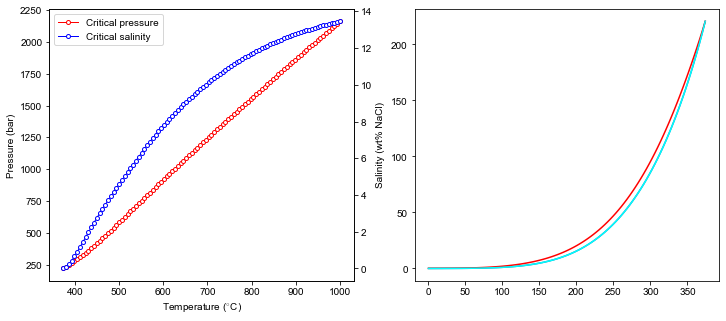

In [4]:
# plot using mpl
fig, axes = plt.subplots(1,2,figsize=(12,5))
# in T-p space
ax=axes[0]
l1,=ax.plot(T,p,marker='o',ms=4, mfc='w',mec='r',lw=1,color='r', label='Critical pressure')
ax.set_xlabel('Temperature ($^{\circ}$C)')
ax.set_ylabel('Pressure (bar)')
ax2=ax.twinx()
l2,=ax2.plot(T,x,marker='o',ms=4, mfc='w',mec='b',lw=1,color='b', label='Critical salinity')
ax2.set_ylabel('Salinity (wt% NaCl)')
ax.legend(handles=(l1,l2))

# boiling curve of water
ax=axes[1]
ax.plot(T_boil, p_boil)
ax.plot(T_boil,p_boil_swEOS,'r')
ax.plot(T_boil,p_boil_IAPWS97,'cyan')
print((p_boil_swEOS - p_boil_IAPWS97).max())
plt.savefig('CriticalCurve_H2ONaCl.pdf',bbox_inches='tight')

plt.show()

In [5]:
# plot using pyecharts
line = Line(init_opts=opts.InitOpts(width="800px", height="450px"))
line.add_xaxis(xaxis_data=T)
line.add_yaxis(series_name="Pressure", y_axis=p, color='blue', label_opts=opts.LabelOpts(is_show=False))
line.extend_axis(yaxis=opts.AxisOpts(name="Salinity (wt.% NaCl)",type_="value", name_location='middle',name_gap=20,
                                     axislabel_opts=opts.LabelOpts(formatter="{value}"),))
line.add_yaxis(series_name="Salinity", y_axis=x, color='red', yaxis_index=1, label_opts=opts.LabelOpts(is_show=False))

line.set_global_opts(tooltip_opts=opts.TooltipOpts(is_show=True, trigger="axis", axis_pointer_type="line"),
        yaxis_opts=opts.AxisOpts(
        name="Pressure (bar)",
        name_location='middle',
        name_gap=45,
        type_="value",
        axislabel_opts=opts.LabelOpts(formatter="{value}"),
        axistick_opts=opts.AxisTickOpts(is_show=True),
        splitline_opts=opts.SplitLineOpts(is_show=True),),
        xaxis_opts=opts.AxisOpts(name="Temperature (°C)",name_location='middle',name_gap=25,min_=H2O.T_Critic-3),
#         datazoom_opts=[opts.DataZoomOpts(type_='slider',range_start=36, range_end=100,yaxis_index=[0,1],xaxis_index=0, start_value=300)],
        toolbox_opts=opts.ToolboxOpts(is_show=True,orient='horizontal',pos_left='90%',
                                      feature=opts.ToolBoxFeatureOpts(
                                      save_as_image=opts.ToolBoxFeatureSaveAsImageOpts(is_show=True,title='Save as image',name='CriticalCurve_H2ONaCl',background_color='white',pixel_ratio=6,type_='jpg'),
                                      restore=None,
                                      data_view=opts.ToolBoxFeatureDataViewOpts(is_show=True,title="Show data"),
                                      data_zoom=opts.ToolBoxFeatureDataZoomOpts(is_show=False),
                                      magic_type=opts.ToolBoxFeatureMagicTypeOpts(is_show=False),
                                      brush=None,
                                      )
                                     )
)
line.render('%s/criticalCruve_H2ONaCl.html'%(path_echarts))
line.render_notebook()

In [6]:
# plot using pyecharts
line = Line(init_opts=opts.InitOpts(width="800px", height="450px"))
line.add_xaxis(xaxis_data=T_boil)
line.add_yaxis(series_name="swEOS:Driesner", y_axis=p_boil_swEOS, color='black', label_opts=opts.LabelOpts(is_show=False))
line.add_yaxis(series_name="swEOS:IAPWS97", y_axis=p_boil, color='blue', label_opts=opts.LabelOpts(is_show=False))
line.add_yaxis(series_name="IAPWS97", y_axis=p_boil_IAPWS97, color='green', label_opts=opts.LabelOpts(is_show=False))
line.add_yaxis(series_name="Driesner - IAPWS97", y_axis=p_boil_swEOS-p_boil_IAPWS97, color='red', label_opts=opts.LabelOpts(is_show=False))

line.set_global_opts(tooltip_opts=opts.TooltipOpts(is_show=True, trigger="axis", axis_pointer_type="line"),
        yaxis_opts=opts.AxisOpts(
        name="Boiling pressure of water (bar)",
        name_location='middle',
        name_gap=45,
        type_="value",
        axislabel_opts=opts.LabelOpts(formatter="{value}"),
        axistick_opts=opts.AxisTickOpts(is_show=True),
        splitline_opts=opts.SplitLineOpts(is_show=True),),
        xaxis_opts=opts.AxisOpts(name="Temperature (°C)",name_location='middle',name_gap=25,min_=H2O.TMIN),
        datazoom_opts=[opts.DataZoomOpts(type_='slider',range_start=0, range_end=100)],
        toolbox_opts=opts.ToolboxOpts(is_show=True,orient='horizontal',pos_left='90%',
                                      feature=opts.ToolBoxFeatureOpts(
                                      save_as_image=opts.ToolBoxFeatureSaveAsImageOpts(is_show=True,title='Save as image',name='CriticalCurve_H2ONaCl',background_color='white',pixel_ratio=6,type_='jpg'),
                                      restore=None,
                                      data_view=opts.ToolBoxFeatureDataViewOpts(is_show=True,title="Show data"),
                                      data_zoom=opts.ToolBoxFeatureDataZoomOpts(is_show=False),
                                      magic_type=opts.ToolBoxFeatureMagicTypeOpts(is_show=False),
                                      brush=None,
                                      )
                                     )
)
line.render('%s/criticalPressure_belowCriticalPoint_H2O.html'%(path_echarts))
line.render_notebook()